In [1]:
import numpy as np
from plotbin import plot_velfield, symmetrize_velfield, display_bins
import matplotlib.pyplot as plt

In [2]:
x, y, vrms, err = np.loadtxt("Vrms_Map.txt", unpack=True)
xrot, yrot, vrot, erot = np.loadtxt("Vrms_Map_rot.txt", unpack=True)
ybin, xbin, bin_num = np.loadtxt("Full_Spec_Voronoi_OutPut.txt", unpack=True)
Bin, vel, disp, chi2, dV, dsigma = np.loadtxt("Output_Ppxf_BadAssTemplate.txt", unpack=True)

vel = vel - vel[0]                                       #vel[0] velocity of central px
vrms_bin = np.sqrt(np.array(vel)**2 + np.array(disp)**2) #Vrms velocity

## Original Position

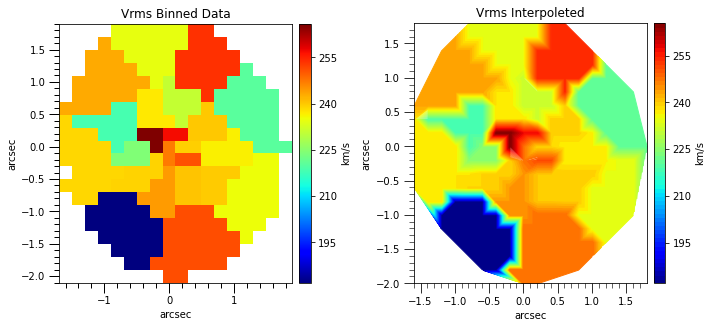

In [3]:
#Vrms Interploated
plt.figure(figsize=(10,8))

plt.subplot(121)
plt.title(r"Vrms Binned Data")
display_bins.display_bins(x=(xbin-29)*0.2, y=(ybin-29)*0.2, bin_num=bin_num.astype(int), vel_bin=vrms_bin,
                          colorbar=True, cmap="jet", label='km/s')
plt.xlabel("arcsec")
plt.ylabel("arcsec")


plt.subplot(122)
plt.title(r"Vrms Interpoleted")
plot_velfield.plot_velfield((x-29)*0.2, (y-29)*0.2, vrms,  colorbar=True, label='km/s', cmap=plt.cm.jet, nodots=True)
plt.xlabel("arcsec")
plt.ylabel("arcsec")

plt.tight_layout()

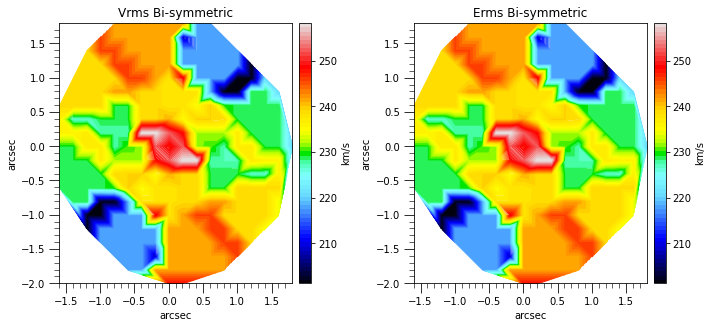

In [4]:
#Vrms Interploated
new_vrms = symmetrize_velfield.symmetrize_velfield(xbin=(x-29)*0.2, ybin=(y-29)*0.2,vel_bin=vrms,sym=4)
new_err = symmetrize_velfield.symmetrize_velfield(xbin=(x-29)*0.2, ybin=(y-29)*0.2,vel_bin=err,sym=4)

plt.figure(figsize=(10,8))

plt.subplot(121)
plt.title(r"Vrms Bi-symmetric")
plot_velfield.plot_velfield(x=(x-29)*0.2, y=(y-29)*0.2, vel=new_vrms, colorbar=True, nodots=True, label=r"km/s")
plt.xlabel("arcsec")
plt.ylabel("arcsec")


plt.subplot(122)
plt.title(r"Erms Bi-symmetric")
plot_velfield.plot_velfield(x=(x-29)*0.2, y=(y-29)*0.2, vel=new_err, colorbar=True, nodots=True, label=r"km/s")
plt.xlabel("arcsec")
plt.ylabel("arcsec")

plt.tight_layout()

## Rot Position

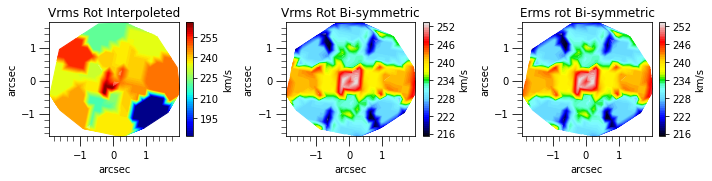

In [5]:
#Vrms Interploated
new_vrot = symmetrize_velfield.symmetrize_velfield(xbin=(xrot)*0.2, ybin=(yrot)*0.2,vel_bin=vrot,sym=2, pa=0.0)
new_errot = symmetrize_velfield.symmetrize_velfield(xbin=(xrot)*0.2, ybin=(yrot)*0.2,vel_bin=erot,sym=2, pa=0.0)

plt.figure(figsize=(10,8))

plt.subplot(131)
plt.title(r"Vrms Rot Interpoleted")
plot_velfield.plot_velfield(xrot*0.2, yrot*0.2, vrot,  colorbar=True, label='km/s', cmap=plt.cm.jet, nodots=True)
plt.xlabel("arcsec")
plt.ylabel("arcsec")

plt.subplot(132)
plt.title(r"Vrms Rot Bi-symmetric")
plot_velfield.plot_velfield(x=(xrot)*0.2, y=(yrot)*0.2, vel=new_vrot, colorbar=True, nodots=True, label=r"km/s")
plt.xlabel("arcsec")
plt.ylabel("arcsec")

plt.subplot(133)
plt.title(r"Erms rot Bi-symmetric")
plot_velfield.plot_velfield(x=(xrot)*0.2, y=(yrot)*0.2, vel=new_errot, colorbar=True, nodots=True, label=r"km/s")
plt.xlabel("arcsec")
plt.ylabel("arcsec")

plt.tight_layout()